In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
from scipy.signal import savgol_filter

In [2]:

HaloA_Ionisation_1pc = {
    100:0.0005347659564483328,
    209:2.578390369087233e-05,
    318:0.0003055805465419045,
    427:0.008369011896556122,
    503:0.08170459863164171,
    732:0.9982552504157665,
    998:0.0274449528362948,
    1107:0.13508570035568065,
    1281:0.19131252091939108,
    1412:0.249220034489082,
    1499:0.14803467601539386,
    1608:0.4747193790528486,
    1717:0.00118412461784988,
    1783:0.14390933863707814,
    1892:0.134016168442784,
    2023:0.07106657585515166
}

HaloA_Recombination_1pc = {
    100:0.001279712670165506,
    209:3.8544288095522924e-05,
    318:5.376929244129769e-05,
    427:1.7012374552702512e-05,
    503:0.010161301803888776,
    732:53.74816338974836,
    998:1.2877944022356126e-05,
    1107:5.4870750557225605e-05,
    1281:2.1752183818785135e-05,
    1412:0.0004331496386337279,
    1499:3.5742279813715714e-05,
    1608:5.8436940693877395e-05,
    1717:0.00012853537298306006,
    1783:2.371103942177591e-05,
    1892:0.00016415499820184766,
    2023:0.00010073532437358124
}

HaloA_Ionisation_5pc = {1:4.9e-9,
                    209:2e-9,
                    318:2.3e-8,
                    427:8.6e-7,
                    503:0.0023,
                    732:0.031,
                    998:0.18,
                    1107:0.21,
                    1282:0.33,
                    1412:0.39,
                    1500:0.40,
                    1609:0.44,
                    1718:0.39,
                    1783:0.36,
                    1892:0.46,
                    2023:0.46}

HaloA_Recombination_5pc = {1: 1.7e-4,
                       209:4e-5,
                       318:3.2e-5,
                       427:1.2e-5,
                       503:6.2e-6,
                    732:6.4e-7,
                    998:4.3e-5,
                    1107:7.3e-5,
                    1282:2.8e-5,
                    1412:6.9e-6,
                    1500:9.4e-6,
                    1609:3.6e-6,
                    1718:1.0e-5,
                    1783:3.3e-6,
                    1892:5.7e-6,
                    2023:5.5e-6}

HaloA_Ionisation_20pc = {1:4.9e-9,
                         100:6.88e-8,
                        209:3.2e-9,
                        318:3.09e-8,
                    427:1.42e-6,
                    503:3.59e-5,
                    732:0.0004,
                    998:0.005,
                    1107:0.01,
                    1282:0.04,
                    1412:0.09,
                    1500:0.13,
                    1609:0.199,
                    1718:0.25,
                    1783:0.27,
                    1892:0.31,
                    2023:0.37}

HaloA_Recombination_20pc = {1: 1.7e-6,
                            100: 6.44e-5,
                       209:1e-5,
                       318:7e-6,
                       427:4.78e-6,
                       503:4.43e-6,
                    732:5.36e-7,
                    998:4.86e-5,
                    1107:8.54e-5,
                    1282:3.10e-5,
                    1412:1.11e-5,
                    1500:1.68e-5,
                    1609:6.87e-6,
                    1718:7.88e-6,
                    1783:5.06e-6,
                    1892:4.66e-6,
                    2023:3.18e-6}


HaloA_times = HaloA_Ionisation_5pc.keys()
print("HaloA_times = ", list(HaloA_times))
print("HaloA_vals = ", HaloA_Ionisation_5pc.values())

HaloA_times =  [1, 209, 318, 427, 503, 732, 998, 1107, 1282, 1412, 1500, 1609, 1718, 1783, 1892, 2023]
HaloA_vals =  dict_values([4.9e-09, 2e-09, 2.3e-08, 8.6e-07, 0.0023, 0.031, 0.18, 0.21, 0.33, 0.39, 0.4, 0.44, 0.39, 0.36, 0.46, 0.46])


In [3]:
HaloB_Ionisation_1pc = {28: 1.3e-6,
                    109: 4e-6,
                    200: 4.3e-7,
                    277: 1.6e-6,
                    381: 4.2e-7,
                    469: 0.0014,
                    732:0.12,
                    994: 0.70,
                    1103:0.93,
                    1354:0.99}

HaloB_Recombination_1pc = {28: 1.3e-4, 
                       109: 1.3e-4,
                       200: 6.3e-5,
                       277: 1.6e-4,
                       381: 1.3e-4,
                       469: 2.9e-5,
                       732:1.7e-3,
                       994: 0.52,
                       1103:6.1,
                       1354:63}

HaloB_Ionisation_5pc = {28: 1.06e-6,
                    109: 3.21e-6,
                    200: 3.41e-7,
                    277: 1.29e-6,
                    381: 9.76e-7,
                    469: 2.07e-5,
                    732: 0.007,
                    994: 0.017,
                    1103:0.015,
                    1354:0.028,
                    1408:0.03244883428591848,
                    1474:0.038999717252410554,
                    1550:0.04608536617535097,
                    1615:0.07870608951869927,
                    1681:0.11873714111568875,
                    1779:0.20674433851975724,
                    1884:0.26589327305977456}

HaloB_Recombination_5pc = {28: 2.55e-5, 
                       109: 4.61e-5,
                       200: 2.80e-5,
                       277: 3.84e-5,
                       381: 4.99e-5,
                       469: 3.99e-5,
                       732: 5.08e-6,
                       994: 1.05e-6,
                       1103:4.71e-7,
                       1354:1.22e-7,
                       1408:1.2597299879218635e-07,
                    1474:7.023723237172256e-08,
                    1550:6.159453442437458e-08,
                    1615:4.983264758700195e-08,
                    1681:7.680979477254673e-08,
1779:6.13366739375113e-07,
                1884:8.016388199018447e-06
                          } 

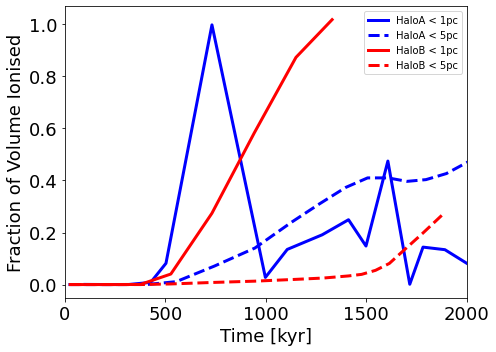

In [10]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(112)

#haloAx_1pc = savgol_filter(list(HaloA_Ionisation_1pc.keys()), 3, 1)
#haloAy_1pc = savgol_filter(list(HaloA_Ionisation_1pc.values()), 3, 1)
haloAx_1pc = list(HaloA_Ionisation_1pc.keys())
haloAy_1pc = list(HaloA_Ionisation_1pc.values())
haloAx_5pc = savgol_filter(list(HaloA_Ionisation_5pc.keys()), 3, 1)
haloAy_5pc = savgol_filter(list(HaloA_Ionisation_5pc.values()), 3, 1)
haloBx_1pc = savgol_filter(list(HaloB_Ionisation_1pc.keys()), 3, 1)
haloBy_1pc = savgol_filter(list(HaloB_Ionisation_1pc.values()), 3, 1)
haloAx_20pc = savgol_filter(list(HaloA_Ionisation_20pc.keys()), 3, 1)
haloAy_20pc = savgol_filter(list(HaloA_Ionisation_20pc.values()), 3, 1)
haloBx_5pc = savgol_filter(list(HaloB_Ionisation_5pc.keys()), 3, 1)
haloBy_5pc = savgol_filter(list(HaloB_Ionisation_5pc.values()), 3, 1)

#HaloA
ax1.plot(haloAx_1pc, haloAy_1pc, label='HaloA < 1pc', lw=3, color='b')
ax1.plot(haloAx_5pc, haloAy_5pc, label='HaloA < 5pc', lw=3, color='b', ls='dashed')
#HaloB
ax1.plot(haloBx_1pc, haloBy_1pc, label='HaloB < 1pc', lw=3, color='r')
ax1.plot(haloBx_5pc, haloBy_5pc, label='HaloB < 5pc', lw=3, color='r', ls='dashed')

ax1.set_xlabel("Time [kyr]", fontsize=18)
ax1.set_ylabel("Fraction of Volume Ionised", fontsize=18)
ax1.set_xlim(0.0, 2000)
ax1.tick_params(labelsize=18)
ax1.legend()
fig.tight_layout()
fig.savefig("Ionisation.pdf")


HaloA_times =  [1, 209, 318, 427, 503, 732, 998, 1107, 1282, 1412, 1500, 1609, 1718, 1783, 1892, 2023]
HaloA_vals =  dict_values([0.00017, 4e-05, 3.2e-05, 1.2e-05, 6.2e-06, 6.4e-07, 4.3e-05, 7.3e-05, 2.8e-05, 6.9e-06, 9.4e-06, 3.6e-06, 1e-05, 3.3e-06, 5.7e-06, 5.5e-06])


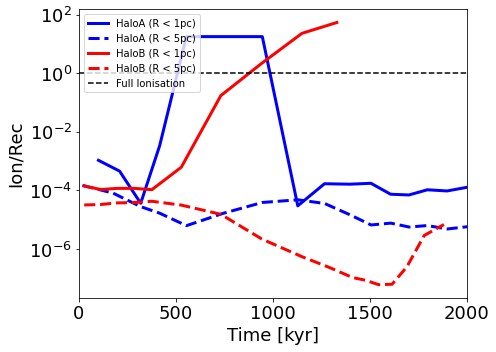

In [12]:
print("HaloA_times = ", list(HaloA_times))
print("HaloA_vals = ", HaloA_Recombination_5pc.values())
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)

haloAx_1pc = savgol_filter(list(HaloA_Recombination_1pc.keys()), 3, 1)
haloAy_1pc = savgol_filter(list(HaloA_Recombination_1pc.values()), 3, 1)
haloAx_5pc = savgol_filter(list(HaloA_Recombination_5pc.keys()), 3, 1)
haloAy_5pc = savgol_filter(list(HaloA_Recombination_5pc.values()), 3, 1)
haloAx_20pc = savgol_filter(list(HaloA_Recombination_20pc.keys()), 3, 1)
haloAy_20pc = savgol_filter(list(HaloA_Recombination_20pc.values()), 3, 1)

haloBx_1pc = savgol_filter(list(HaloB_Recombination_1pc.keys()), 3, 1)
haloBy_1pc = savgol_filter(list(HaloB_Recombination_1pc.values()), 3, 1)
haloBx_5pc = savgol_filter(list(HaloB_Recombination_5pc.keys()), 3, 1)
haloBy_5pc = savgol_filter(list(HaloB_Recombination_5pc.values()), 3, 1)


#HaloA
ax1.semilogy(haloAx_1pc, haloAy_1pc, label='HaloA (R < 1pc)', lw=3, color='b')
ax1.semilogy(haloAx_5pc, haloAy_5pc, label='HaloA (R < 5pc)', lw=3, color='b', ls='dashed')

#HaloB
ax1.semilogy(haloBx_1pc, haloBy_1pc, label='HaloB (R < 1pc)', lw=3, color='r')
ax1.semilogy(haloBx_5pc, haloBy_5pc, label='HaloB (R < 5pc)', lw=3, color='r', ls='dashed')
#ax1.semilogy(haloAx_20pc, haloAy_20pc, label='HaloA (R < 20pc)', lw=3, color='b', ls='dashed')

ax1.axhline(y=1.0, ls='dashed',c='k',label='Full Ionisation')
ax1.set_xlabel("Time [kyr]", fontsize=18)
ax1.set_ylabel("Ion/Rec", fontsize=18)
ax1.set_xlim(0.0, 2000)
#ax1.set_ylim(1e-7, 1e1)
ax1.tick_params(labelsize=18)
ax1.legend(loc='upper left')
fig.tight_layout()
fig.savefig("Recombination.pdf")